In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mygrad.components as mc
import mygrad.functional as mf
from mygrad.losses import MeanSquareErrorLoss
from mygrad.optimizers import SGD
from mygrad.preprocessors import MinMaxScaler, StandardScaler
from mygrad.trainers import Trainer as RegressionTrainer, ProgressBar
from mygrad.dataloaders import NumpyRegressionDataloader

/tmp/ipykernel_16763/1793803076.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Simple Square

In [2]:
train_df = pd.read_csv("../mio1/regression/square-simple-training.csv")
test_df = pd.read_csv("../mio1/regression/square-simple-test.csv")

In [3]:
X_train = train_df["x"].values
y_train = train_df["y"].values

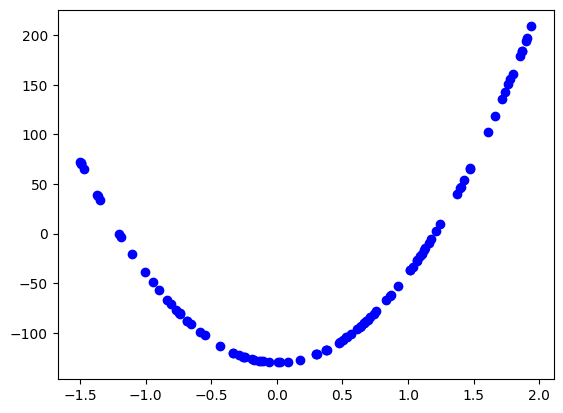

In [4]:
p = np.argsort(X_train)
plt.plot(X_train[p], y_train[p], "bo")

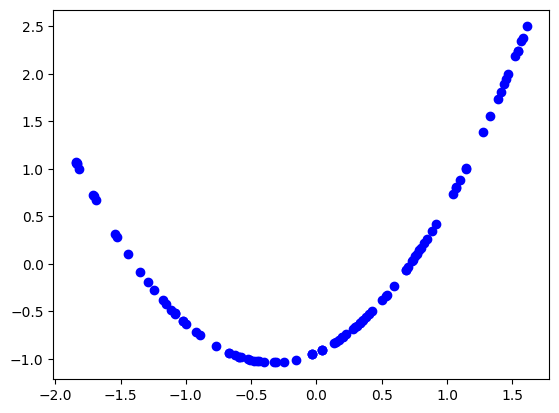

In [5]:
input_normalizer = StandardScaler()
output_normalizer = StandardScaler()

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_train_scaled = input_normalizer.fit_transform(X_train)
y_train_scaled = output_normalizer.fit_transform(y_train)

plt.plot(X_train_scaled[p, :], y_train_scaled[p, :], "bo")

In [6]:
X_train.size

100

In [12]:
model = mc.Sequential(
    mc.Linear(1, 10, init="xavier"),
    mc.Tanh(),
    mc.Linear(10, 10, init="xavier"),
    mc.Tanh(),
    mc.Linear(10, 1, init="uniform"),
)
optimizer = SGD(model.parameters(), learning_rate=0.01)
loss = MeanSquareErrorLoss()

train_dataloader = NumpyRegressionDataloader(X_train_scaled, y_train_scaled, batch_size=100, shuffle=True)
trainer = RegressionTrainer(model, optimizer, loss, train_dataloader, plugins=[ProgressBar()])
train_outputs = trainer.train(20_000)

Training epochs:   0%|          | 0/20000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Wyres funkcji kosztu w trakcje uczenia na simple-square\n SGD learning rate = 0.1 epochs = 2000')

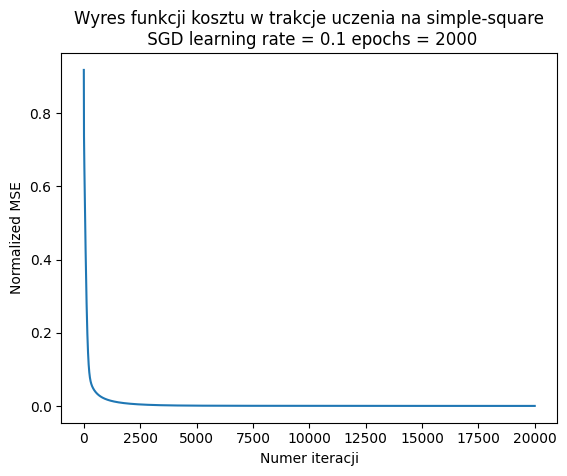

In [13]:
plt.plot(train_outputs["loss"])
plt.xlabel("Numer iteracji")
plt.ylabel("Normalized MSE")
plt.title("Wyres funkcji kosztu w trakcje uczenia na simple-square\n SGD learning rate = 0.1 epochs = 2000")

MSE: 2.551889962575535


/tmp/ipykernel_16763/2506799071.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse = float(mf.mse(output_normalizer.reverse(y_pred), y_train))


Text(0.5, 1.0, 'Predykcja modelu na danych treningowych simple-square\n SGD learning rate = 0.01 epochs = 20000, MSE = 2.55')

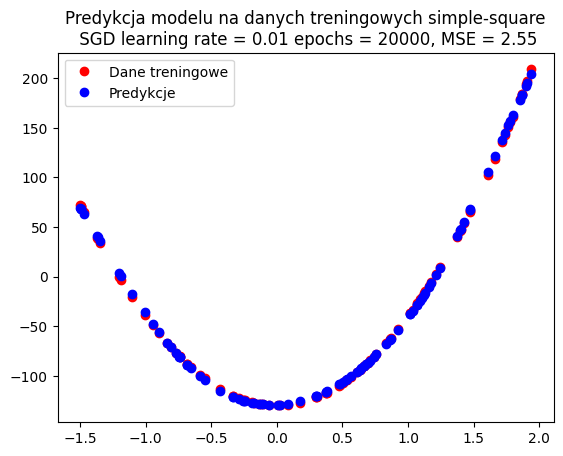

In [19]:
y_pred = model.forward(X_train_scaled)
plt.plot(X_train, y_train, "ro", label="Dane treningowe")
plt.plot(X_train, output_normalizer.reverse(y_pred), "bo", label="Predykcje")

mse = float(mf.mse(output_normalizer.reverse(y_pred), y_train))
print(f"MSE: {mse}")
plt.legend()
plt.title(f"Predykcja modelu na danych treningowych simple-square\n SGD learning rate = 0.01 epochs = 20000, MSE = {mse:.2f}")

MSE: 3.584183006444083


/tmp/ipykernel_16763/261001618.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse = float(mf.mse(y_pred, y_test))


Text(0.5, 1.0, 'Predykcja modelu na danych testowych simple-square\n SGD learning rate = 0.01 epochs = 20000, MSE = 3.58')

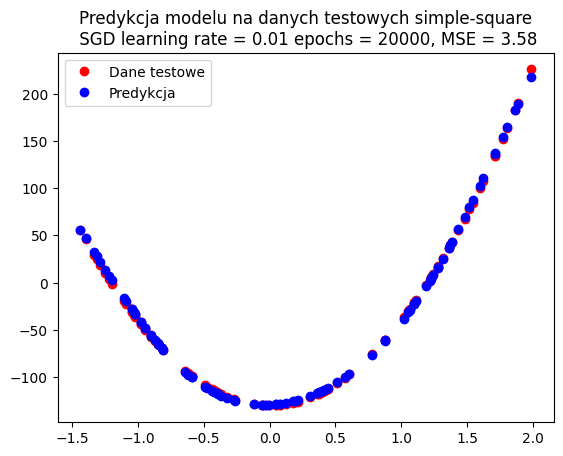

In [17]:
X_test = test_df["x"].values.reshape(-1, 1)
y_test = test_df["y"].values.reshape(-1, 1)

X_test_scaled = input_normalizer.transform(X_test)

y_pred_scaled = model.forward(X_test_scaled)
y_pred = output_normalizer.reverse(y_pred_scaled)

plt.plot(X_test, y_test, "ro", label="Dane testowe")
plt.plot(X_test, y_pred, "bo", label="Predykcja")

mse = float(mf.mse(y_pred, y_test))
print(f"MSE: {mse}")
plt.legend()
plt.title(f"Predykcja modelu na danych testowych simple-square\n SGD learning rate = 0.01 epochs = 20000, MSE = {mse:.2f}")